# Data Mining - Redes Neuronales Artificiales 🧠

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:**

## Import Libraries ⬇️

In [3]:
# Standard libraries
import time
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, mean_squared_error, mean_absolute_error,
                             r2_score, classification_report, f1_score, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

# Set matplotlib inline
%matplotlib inline

# Set random state
random_state = 42

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

ModuleNotFoundError: No module named 'distutils'

## Data Upload 📄

In [ ]:
df = pd.read_csv('./data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis 🔎

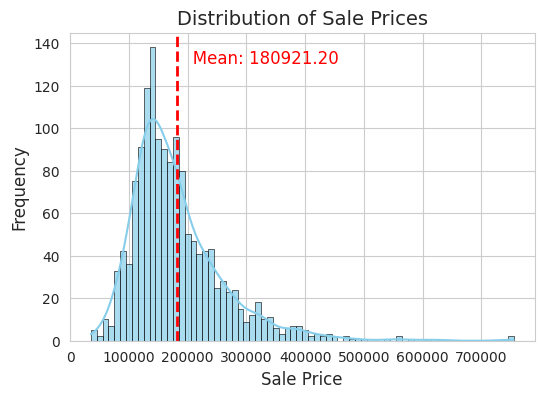

In [ ]:
sns.set_style("whitegrid")

# Plotting the histogram of 'SalePrice' column from DataFrame 'df'
sns.histplot(x='SalePrice', data=df, kde=True, color='skyblue', binwidth=10000, alpha=0.7, edgecolor='black')

# Plot settings
plt.title('Distribution of Sale Prices', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculating the mean of 'SalePrice' column
mean_value = df['SalePrice'].mean()

# Adding a vertical line representing the mean value
plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)

# Adding text annotation for the mean value
plt.text(mean_value, plt.ylim()[1]*0.9, '   Mean: {:.2f}'.format(mean_value), color='r', fontsize=12)

plt.show()

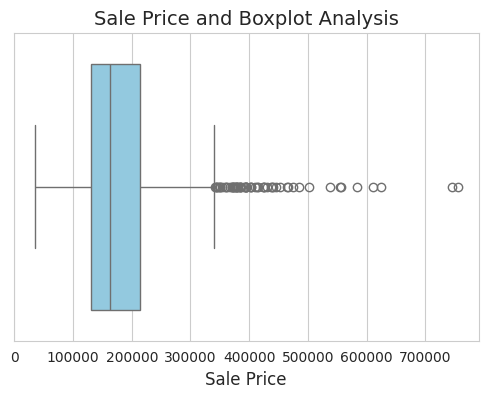

In [ ]:
sns.set_style("whitegrid")

# Plotting the boxplot of 'SalePrice' column from DataFrame 'df'
sns.boxplot(x='SalePrice', data=df, color='skyblue')

# Plot settings
plt.title('Sale Price and Boxplot Analysis', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Data Preprocessing 🗂️

### Handling Missing Values

In [ ]:
# Fill missing values in low NaN count columns
df['Electrical'] = df['Electrical'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [ ]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [ ]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [ ]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [ ]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [ ]:
# Show columns with NaN values
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]

if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

No columns with NaN values found.


### Feature Engineering

In [ ]:
# Define conditions for categorizing SalePrice
conditions = [
    (df['SalePrice'] < 150000),
    (df['SalePrice'] >= 150000) & (df['SalePrice'] <= 250000),
    (df['SalePrice'] > 250000)
]

# Define labels for the categories
labels = [0, 1, 2]

# Create a new column 'SalePriceCategory' based on the conditions and labels
df['SalePriceCategory'] = np.select(conditions, labels)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,2
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,0


### Encoding

In [ ]:
# Columns to encode, separated by feature category
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [ ]:
# Convert nominal features into dummy variables
df = pd.get_dummies(df, columns = nominalFeatures)

In [ ]:
# Define ordinal categories for each ordinal feature
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)

# Fit and transform ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [ ]:
# Define encoding categories for each other ordinal feature
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=encodingCategories)

# Fit and transform other ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [ ]:
# Create a copy of the dataframe
df_cp = df.copy()

# Remove SalePrice from the dataframe
df_cp.pop('SalePrice')

# Separate target variable 'SalePriceCategory' from features
y = df_cp.pop('SalePriceCategory')
X = df_cp

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 673.0 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 168.2 KB


### Feature Standarization

In [ ]:
# Scale the features in the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Scale the features in the test set
X_test = sc.transform(X_test)

## Multi-layer Perceptron Classifiers 🖥

### Initial Iteration Using Different Topologies & Activation Functions

In [ ]:
# Creating MLP classifier with tanh activation function and (6,3) hidden layer sizes
mlp_tanh = MLPClassifier(activation='tanh', hidden_layer_sizes=(6,3), max_iter=1000, random_state=random_state)

# Recording start time
start_time = time.time()

# Fitting the MLP classifier to training data
mlp_tanh.fit(X_train, y_train)

# Recording end time
end_time = time.time()

# Calculating training accuracy for tanh model
train_accuracy_tanh = accuracy_score(y_train, mlp_tanh.predict(X_train))

# Calculating testing accuracy for tanh model
test_accuracy_tanh = accuracy_score(y_test, mlp_tanh.predict(X_test))

# Printing training time with tanh activation function and (6, 3) hidden layer sizes
print('Model with tanh activation function and (6, 3) hidden layer sizes:')
print('Training time: {:.4f} seconds'.format(end_time - start_time))
print('Training accuracy: {:.2f}%'.format(train_accuracy_tanh * 100))
print('Testing accuracy: {:.2f}%'.format(test_accuracy_tanh * 100))
print('-' * 30)  # Separate with dashes

# Creating MLP classifier with logistic activation function and (3,4) hidden layer sizes
mlp_logistic = MLPClassifier(activation='logistic', hidden_layer_sizes=(3,4), max_iter=1000, random_state=random_state)

# Recording start time
start_time = time.time()

# Fitting the MLP classifier to training data
mlp_logistic.fit(X_train, y_train)

# Recording end time
end_time = time.time()

# Calculating training accuracy for logistic model
train_accuracy_logistic = accuracy_score(y_train, mlp_logistic.predict(X_train))

# Calculating testing accuracy for logistic model
test_accuracy_logistic = accuracy_score(y_test, mlp_logistic.predict(X_test))

# Printing training time with logistic activation function and (3, 4) hidden layer sizes
print('Model with logistic activation function and (3, 4) hidden layer sizes:')
print('Training time: {:.4f} seconds'.format(end_time - start_time))
print('Training accuracy: {:.2f}%'.format(train_accuracy_logistic * 100))
print('Testing accuracy: {:.2f}%'.format(test_accuracy_logistic * 100))


Model with tanh activation function and (6, 3) hidden layer sizes:
Training time: 15.5693 seconds
Training accuracy: 99.23%
Testing accuracy: 83.56%
------------------------------
Model with logistic activation function and (3, 4) hidden layer sizes:
Training time: 10.8552 seconds
Training accuracy: 98.12%
Testing accuracy: 83.56%


#### Results and Findings

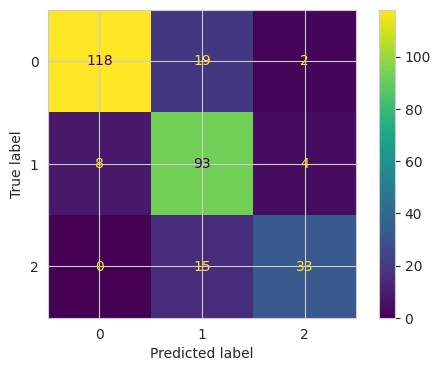

In [ ]:
# Generating predictions on the test data using Tanh
y_pred = mlp_tanh.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 118 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 93 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 33 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama baja (clase 0) y gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1).

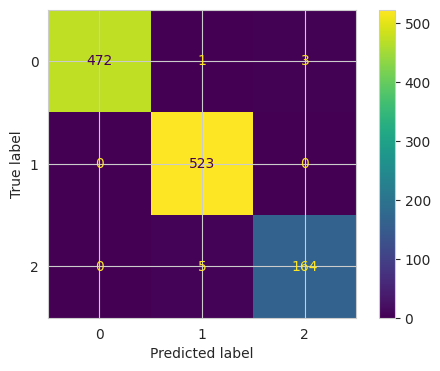

In [ ]:
# Generating predictions on the training data using Tanh
y_pred = mlp_tanh.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 472 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 523 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 164 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama baja (clase 0) y gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1).

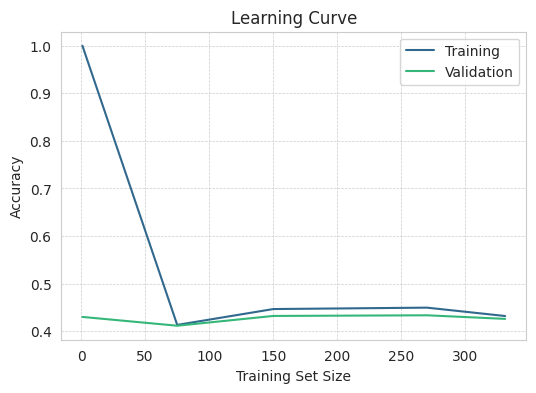

In [ ]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Computing learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=mlp_tanh,  # Classifier model
    X=X,  # Features
    y=y,  # Target variable
    scoring="accuracy",  # Scoring metric for classification (e.g., accuracy)
    train_sizes=[1, 75, 150, 270, 331]  # Training set sizes to compute the learning curve
)

# Plotting the learning curve with custom palette and grid style
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training", color=palette[0])  # Plotting training scores with custom color
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation", color=palette[1])  # Plotting validation scores with custom color

# Adding labels and title
plt.title("Learning Curve")  # Setting title
plt.xlabel("Training Set Size")  # Setting x-label
plt.ylabel("Accuracy")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

La brecha de generalización para la curva de entrenamiento y de validación se vuelve extremadamente pequeña a medida que aumenta el tamaño del conjunto de datos de entrenamiento. Esto indica que agregar más muestras al modelo no mejorará su rendimiento. Tanto en las matrices de confusión, como en las métricas de evaluación del modelo y la curva de aprendizaje se evidencia un fuerte sobreajuste. Lo anterior podría implicar que el modelo está memorizando la data de entrenamiento en vez de los patrones de esta, teniendo así un excelente desempeño en el conjunto de datos de entrenamiento pero fallando en generalizar datos que aún no ha visto.

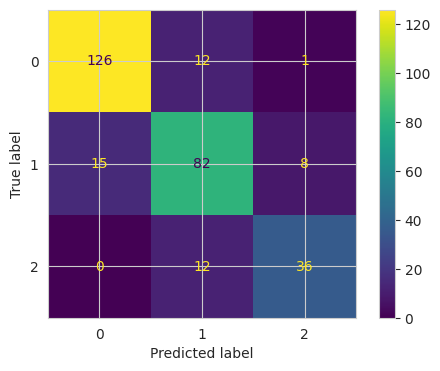

In [ ]:
# Generating predictions on the test data using Logistic
y_pred = mlp_logistic.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 126 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 82 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 36 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama alta (clase 2).

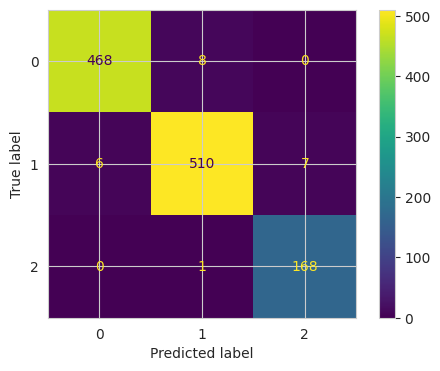

In [ ]:
# Generating predictions on the training data using Logistic
y_pred = mlp_logistic.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 468 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 510 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 168 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama alta (clase 2).

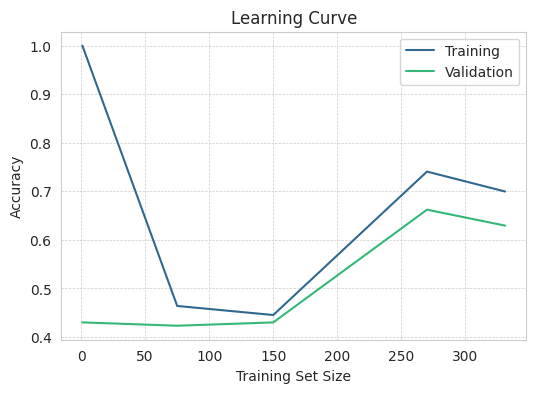

In [ ]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Computing learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=mlp_logistic,  # Classifier model
    X=X,  # Features
    y=y,  # Target variable
    scoring="accuracy",  # Scoring metric for classification (e.g., accuracy)
    train_sizes=[1, 75, 150, 270, 331]  # Training set sizes to compute the learning curve
)

# Plotting the learning curve with custom palette and grid style
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training", color=palette[0])  # Plotting training scores with custom color
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation", color=palette[1])  # Plotting validation scores with custom color

# Adding labels and title
plt.title("Learning Curve")  # Setting title
plt.xlabel("Training Set Size")  # Setting x-label
plt.ylabel("Accuracy")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

Nuevamente, para el modelo que implementa una función logística, la discrepancia de generalización entre las curvas de entrenamiento y validación se reduce considerablemente a medida que se incrementa el tamaño del conjunto de datos de entrenamiento. Este fenómeno sugiere que la adición de más muestras al modelo no conlleva a una mejora significativa en su rendimiento. Tanto las matrices de confusión como las métricas de evaluación del modelo, junto con la curva de aprendizaje, exhiben signos de un marcado sobreajuste.

#### Performance Comparison of MLP Models

|                      | Tanh Model | Logistic Model |
|----------------------|---------------------|--------------|
| Accuracy                  |        0.84            |     0.84        |
| Processing Time                 |        14.11 s            |     8.86 s        |


**Efectividad:**
- Ambos modelos tienen exactamente la misma precisión en el conjunto de prueba (83.56%).
- El modelo con función de activación tanh tiene una mayor precisión en el conjunto de entrenamiento (99.22% comparado con 98.12% del modelo logístico), lo que podría indicar un mayor sobreajuste dado que su rendimiento en el conjunto de entrenamiento es significativamente más alto que en el conjunto de prueba.

**Tiempo de procesamiento**
- El tiempo de procesamiento es menor para el modelo con activación logística (8.86s), comparado con el modelo tanh (14.11s).

**Equivocaciones**
- Modelo tanh:
    - Mejor identificación de las casas de gama media, con 93 correctos contra 82 del modelo logístico.
    - Más errores en la predicción de casas de gama baja y alta.
    
- Modelo logístico:
    - Mejor identificación de casas de gama alta.
    - Más errores en la identificación de casas de gama media.

**Sobreajuste**

Como ya se ha mencionado en celdas atrás, sí existe sobreajuste en los modelos de clasificación debido a la precisión en en training y test de ambos modelos.

En general, ambos modelos exhiben una notable tendencia al sobreajuste, aunque el modelo que emplea la función de activación Tanh parece ser más susceptible a este fenómeno. Además, es crucial destacar que el modelo basado en la función logística logra reducir significativamente el tiempo de procesamiento, con una notable ventaja sobre su contraparte (Tanh), siendo aproximadamente la mitad del tiempo requerido para completar las mismas tareas. En cuanto a la métrica de precisión, ambos modelos alcanzan un puntaje de 0.84, lo cual denota un nivel de desempeño aceptable. Hasta ahora, el modelo logístico es el mejor de ambos, dada a su combinación de precisión y su corto tiempo de procesamiento.

### Second Iteration - Hyperparameter Tuning of Logistic MLP

In [ ]:
# Defining the parameter grid for tuning
parametros_tun = {
    'max_iter': (100, 200, 500, 1000),  # Maximum number of iterations
    'learning_rate_init': (0.01, 0.1, 1, 10),  # Initial learning rate
    'hidden_layer_sizes': ((3, 2), (5, 3), (10, 2))  # Sizes of hidden layers
}

# Creating GridSearchCV object with MLPClassifier and parameter grid
model_grid_search = GridSearchCV(
    mlp_logistic,  # MLPClassifier model with logistic activation
    param_grid=parametros_tun,  # Parameter grid for tuning
    n_jobs=2,  # Number of parallel jobs to run (-1 means using all processors)
    cv=10  # Number of folds for cross-validation
)

# Recording start time
start_time = time.time()

# Fitting the GridSearchCV object to training data
model_grid_search.fit(X_train, y_train)

# Recording end time
end_time = time.time()

# Calculating training accuracy for the best logistic model found by GridSearchCV
train_accuracy_log = accuracy_score(y_train, mlp_tanh.predict(X_train))

# Calculating testing accuracy for the best logistic model found by GridSearchCV
test_accuracy_log = accuracy_score(y_test, mlp_tanh.predict(X_test))

# Printing the best parameters found by GridSearchCV
print('Best parameters found by GridSearchCV:')
print(model_grid_search.best_params_)
print('-' * 30)  # Separate with dashes

# Printing training time, best parameters, training accuracy, and testing accuracy
print('Model with best parameters:')
print('Training time: {:.4f} seconds'.format(end_time - start_time))
print('Training accuracy: {:.2f}%'.format(train_accuracy_log * 100))
print('Testing accuracy: {:.2f}%'.format(test_accuracy_log * 100))
print('-' * 30)  # Separate with dashes

/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Best parameters found by GridSearchCV:
{'hidden_layer_sizes': (5, 3), 'learning_rate_init': 0.01, 'max_iter': 100}
------------------------------
Model with best parameters:
Training time: 277.5776 seconds
Training accuracy: 99.23%
Testing accuracy: 83.56%
------------------------------


#### Results and Findings

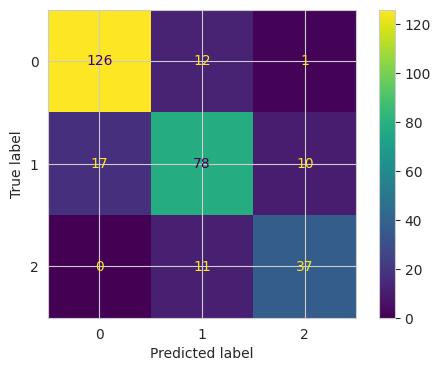

In [ ]:
# Generating predictions on the test data using Logistic
y_pred = model_grid_search.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 126 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 78 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 37 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama alta (clase 2).

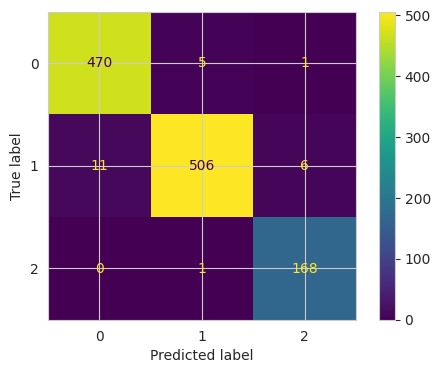

In [ ]:
# Generating predictions on the train data using Logistic
y_pred = model_grid_search.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 470 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 506 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 168 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama alta (clase 2).

/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andrea/python-environments/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

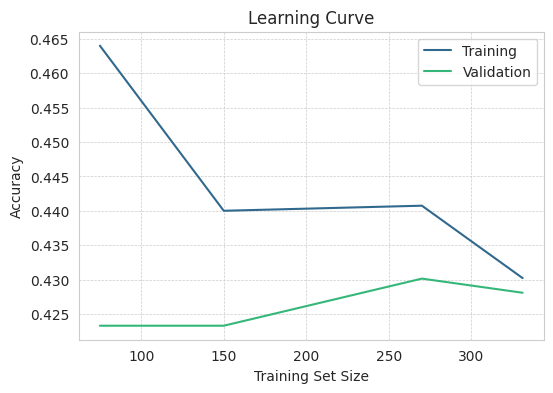

In [ ]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Computing learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_grid_search,  # Classifier model
    X=X,  # Features
    y=y,  # Target variable
    scoring="accuracy",  # Scoring metric for classification (e.g., accuracy)
    train_sizes=[1, 75, 150, 270, 331]  # Training set sizes to compute the learning curve
)

# Plotting the learning curve with custom palette and grid style
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training", color=palette[0])  # Plotting training scores with custom color
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation", color=palette[1])  # Plotting validation scores with custom color

# Adding labels and title
plt.title("Learning Curve")  # Setting title
plt.xlabel("Training Set Size")  # Setting x-label
plt.ylabel("Accuracy")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

Considerando la curva de aprendizaje y la métrica de precisión del modelo, resulta evidente que no se pueden ajustar los parámetros sin incurrir en un mayor sobreajuste. El modelo original, con una función de activación logística y tamaños de capas ocultas (3, 4), mostró una precisión de entrenamiento del 98.12%, con una precisión de prueba del 83.56%. Por su parte, tras el ajuste de parámetros se evidenció una precisión de entrenamiento del 99.23%, (elevándose en más de un 1%) y una precisión de prueba del 83.56%. A pesar del tuneo, la precisión en el conjunto de prueba sigue costante, por lo que ni siquiera valdría la pena.

### Third Iteration - Regression Models Using Different Topologies & Activation Functions

#### Data Splitting & Preprocessing

In [ ]:
# Create a copy of the dataframe
df_cp = df.copy()

# Remove SalePrice from the dataframe
df_cp.pop('SalePriceCategory')

# Separate target variable 'SalePrice' from features
y = df_cp.pop('SalePrice')
X = df_cp

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [ ]:
# Scale the features in the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Scale the features in the test set
X_test = sc.transform(X_test)

#### Regression Models

In [ ]:
# Define model architecture for model_1 with Leaky ReLU
model_1_leakyrelu = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),  # Input layer with 128 neurons
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    Dense(1)  # Output layer with 1 neuron (for regression)
])

# Define optimizer for model_1 with Leaky ReLU
optimizer_1_leakyrelu = Adam(learning_rate=0.0001)

# Compile model_1 with Leaky ReLU
model_1_leakyrelu.compile(optimizer=optimizer_1_leakyrelu, loss='mse', metrics=['mae'])

# Recording start time
start_time = time.time()

# Train model_1 with Leaky ReLU
leaky_history = model_1_leakyrelu.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Recording end time
end_time = time.time()

# Predictions over test & train datasets
y_pred_test = model_1_leakyrelu.predict(X_test)
y_pred_train = model_1_leakyrelu.predict(X_train)

# Printing scores for the model with Leaky ReLU activation function
print('Model with Leaky ReLU activation function and learning rate of 0.0001')
print('Mean Absolute Error on Test: {:,.2f}'.format(mean_absolute_error(y_pred_test, y_test)))
print('Mean Absolute Error on Train: {:,.2f}'.format(mean_absolute_error(y_pred_train, y_train)))
print('Training time: {:.4f} seconds'.format(end_time - start_time))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 38097195008.0000 - mae: 179444.3281 - val_loss: 37841784832.0000 - val_mae: 181101.2812
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38626942976.0000 - mae: 180887.3750 - val_loss: 37841657856.0000 - val_mae: 181101.0625
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39138328576.0000 - mae: 180525.7344 - val_loss: 37841518592.0000 - val_mae: 181100.7656
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41465384960.0000 - mae: 185217.2031 - val_loss: 37841375232.0000 - val_mae: 181100.5156
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39059251200.0000 - mae: 181091.8594 - val_loss: 37841227776.0000 - val_mae: 181100.2188
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37797937152.0000 - mae: 178386.9688 - val_loss: 37841063936.0000 - val_mae: 181099.9219
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38134222848.0000 - mae: 178784.0000 - val_loss: 37840887808.0000 

In [ ]:
# Define model architecture for model_2 with ReLU
model_2_relu = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with 256 neurons, ReLU activation
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons, ReLU activation
    Dense(1)  # Output layer with 1 neuron (for regression)
])

# Define optimizer for model_2 with ReLU
optimizer_2_relu = Adam(learning_rate=0.0001)

# Compile model_2 with ReLU
model_2_relu.compile(optimizer=optimizer_2_relu, loss='mse', metrics=['mae'])

# Recording start time
start_time = time.time()

# Train model_2 with ReLU
relu_history = model_2_relu.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Recording end time
end_time = time.time()

# Predictions over test & train datasets
y_pred_test = model_2_relu.predict(X_test)
y_pred_train = model_2_relu.predict(X_train)

# Printing scores for the model with Leaky ReLU activation function
print('Model with ReLU activation function and (256, 128, 64) hidden layer sizes:')
print('Mean Absolute Error on Test: {:,.2f}'.format(mean_absolute_error(y_pred_test, y_test)))
print('Mean Absolute Error on Train: {:,.2f}'.format(mean_absolute_error(y_pred_train, y_train)))
print('Training time: {:.4f} seconds'.format(end_time - start_time))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 39166775296.0000 - mae: 182829.6094 - val_loss: 37841403904.0000 - val_mae: 181100.1562
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 40542547968.0000 - mae: 183696.3438 - val_loss: 37840441344.0000 - val_mae: 181097.6094
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40529342464.0000 - mae: 183888.8750 - val_loss: 37838749696.0000 - val_mae: 181093.2656
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40607870976.0000 - mae: 182995.7656 - val_loss: 37835624448.0000 - val_mae: 181085.4219
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38279798784.0000 - mae: 181153.4219 - val_loss: 37830287360.0000 - val_mae: 181072.3750
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41485221888.0000 - mae: 186276.9688 - val_loss: 37821521920.0000 - val_mae: 181051.6562
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40707747840.0000 - mae: 184731.1406 - val_loss: 37807878144.0

Según los registros de entrenamiento, el Modelo 2 con función de activación ReLU supera al Modelo 1 con Leaky ReLU en términos de pérdida de validación y MAE. Sugiere que para este problema y conjunto de datos específicos, la activación de ReLU podría ser más adecuada que Leaky ReLU.

#### Results and Findings

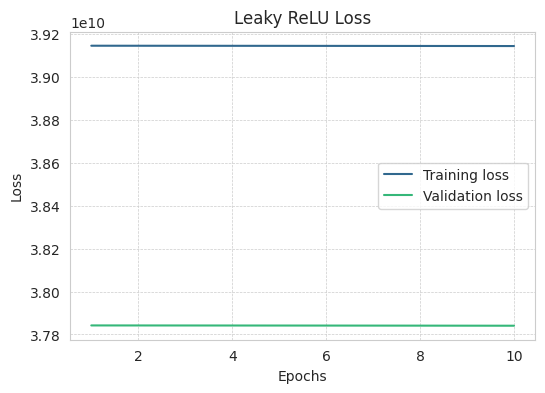

In [ ]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Extracting loss and validation loss from ReLU history
train_loss = leaky_history.history['loss']
val_loss = leaky_history.history['val_loss']

# Creating epochs range for x-axis
epochs = range(1, len(train_loss) + 1)

# Plotting learning curve
plt.plot(epochs, train_loss, label="Training loss", color=palette[0])  # Plotting training loss with custom color
plt.plot(epochs, val_loss, label="Validation loss", color=palette[1])  # Plotting validation loss with custom color

# Adding labels and title
plt.title("Leaky ReLU Loss")  # Setting title
plt.xlabel("Epochs")  # Setting x-label
plt.ylabel("Loss")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

El modelo de regresión con la función Leaky ReLU exhibe un subajuste, evidente en la gráfica de la curva de aprendizaje, donde se observa una línea plana o valores de pérdida ruidosos y relativamente altos. Esto indica que el modelo no logró captar el conjunto de datos de entrenamiento de manera efectiva.

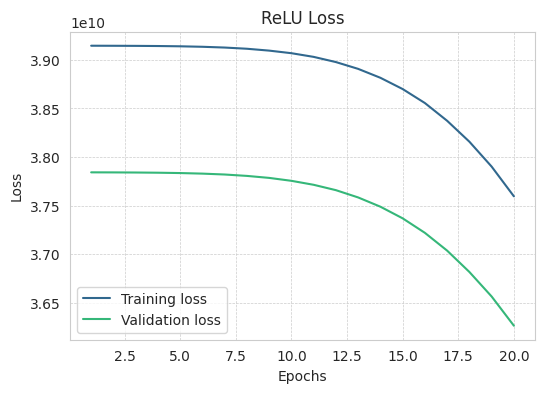

In [ ]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Extracting loss and validation loss from ReLU history
train_loss = relu_history.history['loss']
val_loss = relu_history.history['val_loss']

# Creating epochs range for x-axis
epochs = range(1, len(train_loss) + 1)

# Plotting learning curve
plt.plot(epochs, train_loss, label="Training loss", color=palette[0])  # Plotting training loss with custom color
plt.plot(epochs, val_loss, label="Validation loss", color=palette[1])  # Plotting validation loss with custom color

# Adding labels and title
plt.title("ReLU Loss")  # Setting title
plt.xlabel("Epochs")  # Setting x-label
plt.ylabel("Loss")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

El modelo de regresión con la función ReLU también muestra signos de subajuste, aunque no tan pronunciados como en el caso del modelo anterior. Esto es evidente en la gráfica de la curva de aprendizaje, donde se observa que la pérdida de entrenamiento disminuye y sigue haciéndolo hasta el final del gráfico. Esto sugiere que el modelo aún tiene capacidad para seguir aprendiendo y podría beneficiarse de mejoras adicionales, pero el proceso de entrenamiento se detuvo prematuramente.

#### Performance Comparison of Regression Models

**Sobreajuste:**
- Ambos modelos muestran cierto grado de subajuste, aunque parece que el modelo con Leaky ReLU lo experimenta en un nivel más significativo, siendo incapaz de capturar el conjunto de datos de entrenamiento de manera efectiva.

**Tiempo de procesamiento**
- El tiempo de procesamiento es menor para el modelo con activación Leaky ReLU (4.20s), comparado con el modelo ReLU (7.11s).

**Pérdida de validación y MAE**
- El Modelo 2 con función de activación ReLU supera al Modelo 1 con Leaky ReLU en términos de pérdida de validación y MAE.

Tras analizar detenidamente los resultados obtenidos, se puede justificar la elección del modelo que implementa ReLU como función de activación. Aunque ambos modelos exhiben cierto grado de subajuste, se observa que el modelo con ReLU logra capturar de manera más efectiva el comportamiento de los datos de entrenamiento. Además, el modelo con ReLU muestra una pérdida de validación y un MAE ligeramente menores en comparación con el modelo con Leaky ReLU.

### Fourth Iteration - Hyperparameter Tuning of ReLU Regression Model

In [ ]:
# Define function to create model
def create_model(learning_rate=0.0001):
    model = Sequential([
        Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Create KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define hyperparameters grid
param_grid = {
    'batch_size': [32, 64],
    'epochs': [20, 30],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)

# Recording start time
start_time = time.time()

# Fit GridSearchCV to data
grid_result = grid_search.fit(X_train, y_train)

# Recording end time
end_time = time.time()

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -173001.653682 using {'batch_size': 32, 'epochs': 30}


In [ ]:
# Define model architecture for model_2 with ReLU
model_2_relu = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with 256 neurons, ReLU activation
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons, ReLU activation
    Dense(1)  # Output layer with 1 neuron (for regression)
])

# Define optimizer for model_2 with ReLU
optimizer_2_relu = Adam(learning_rate=0.0001)

# Compile model_2 with ReLU
model_2_relu.compile(optimizer=optimizer_2_relu, loss='mse', metrics=['mae'])

# Recording start time
start_time = time.time()

# Train model_2 with ReLU
relu_history = model_2_relu.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Recording end time
end_time = time.time()

# Predictions over test & train datasets
y_pred_test = model_2_relu.predict(X_test)
y_pred_train = model_2_relu.predict(X_train)

# Printing scores for the model with ReLU activation function
print('Model with ReLU Activation Function and (256, 128, 64) Hidden Layer Sizes:')
print('R² Score on Test: {:,.2f}'.format(r2_score(y_pred_test, y_test)))
print('Mean Absolute Error on Test: {:,.2f}'.format(mean_absolute_error(y_pred_test, y_test)))
print('Mean Absolute Error on Train: {:,.2f}'.format(mean_absolute_error(y_pred_train, y_train)))
print('Training time: {:.4f} seconds'.format(end_time - start_time))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 39065059328.0000 - mae: 181661.7812 - val_loss: 37841207296.0000 - val_mae: 181099.6094
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40253337600.0000 - mae: 183695.0156 - val_loss: 37839990784.0000 - val_mae: 181096.4375
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39200059392.0000 - mae: 181426.7344 - val_loss: 37837938688.0000 - val_mae: 181091.2500
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39633104896.0000 - mae: 181948.9375 - val_loss: 37834493952.0000 - val_mae: 181082.7969
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37377024000.0000 - mae: 176700.0469 - val_loss: 37828886528.0000 - val_mae: 181069.3750
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38885847040.0000 - mae: 180931.1875 - val_loss: 37819850752.0000 - val_mae: 181048.4062
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39026634752.0000 - mae: 180593.3594 - val_loss: 37805625344.0000

#### Results and Findings

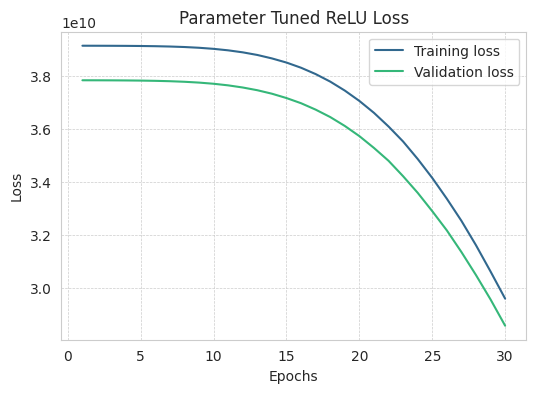

In [ ]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Extracting loss and validation loss from ReLU history
train_loss = relu_history.history['loss']
val_loss = relu_history.history['val_loss']

# Creating epochs range for x-axis
epochs = range(1, len(train_loss) + 1)

# Plotting learning curve
plt.plot(epochs, train_loss, label="Training loss", color=palette[0])  # Plotting training loss with custom color
plt.plot(epochs, val_loss, label="Validation loss", color=palette[1])  # Plotting validation loss with custom color

# Adding labels and title
plt.title("Parameter Tuned ReLU Loss")  # Setting title
plt.xlabel("Epochs")  # Setting x-label
plt.ylabel("Loss")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

La comparación entre el modelo tuneado y original revela datos interesantes sobre el rendimiento. A pesar del proceso de ajuste, el error absoluto medio en el conjunto de prueba disminuyó de 174.327,89 a 157.785,14, lo que indica una mejora en la precisión predictiva. Esta reducción sugiere que el modelo ajustado se generaliza mejor a datos no vistos, lo cual es un resultado deseable. Además, el tiempo de entrenamiento aumentó ligeramente de 9,6924 a 12,1938 segundos, lo que podría atribuirse a la sobrecarga computacional adicional incurrida durante el proceso de ajuste. En particular, ambos modelos exhiben errores absolutos medios relativamente bajos tanto en el conjunto de entrenamiento como en el de prueba, lo que sugiere que están capturando efectivamente los patrones subyacentes en los datos sin un sobreajuste significativo. Sin embargo, el hecho de que el error absoluto medio en el conjunto de entrenamiento sea ligeramente mayor que el del conjunto de prueba para ambos modelos indica un posible desajuste leve, lo que implica que aún puede haber espacio para una mayor optimización para mejorar el rendimiento. Por ende, sí se puede mejorar todavía el modelo sin llegar a sobre ajustarlo.

### Conclusions

#### Classification Algorithms

A continuación se muestran las métricas importantes de cada uno, obtenido del notebook de cada hoja realizada anteriormente con el algoritmo respectivo.

|                       | SVM               | ANN   | Random Forest | Decision trees | Naive Bayes |
|-----------------------|-------------------|-------|---------------|----------------|--------------|
|   Precisión           |        0.87       | 0.84  |     0.82      |      0.79      |     0.67     |
|   Tiempo de ejecución |        0.20       | 10    |     0.13      |      0.34      |     0.53     |

Al analizar la eficacia del modelo de Redes Neuronales Artificiales (ANN) con función logística, para clasificación, en comparación con otros algoritmos previamente empleados, utilizando la misma variable de respuesta, se observa una clara desventaja en su desempeño. La ANN, a pesar de exhibir una precisión bastante aceptable, enfrenta desafíos significativos de sobreajuste, una problemática menos pronunciada en los otros enfoques. Además, el tiempo requerido para su entrenamiento y procesamiento es sustancialmente más elevado en comparación con los demás modelos, lo que limita su practicidad en aplicaciones que requieren eficiencia computacional.

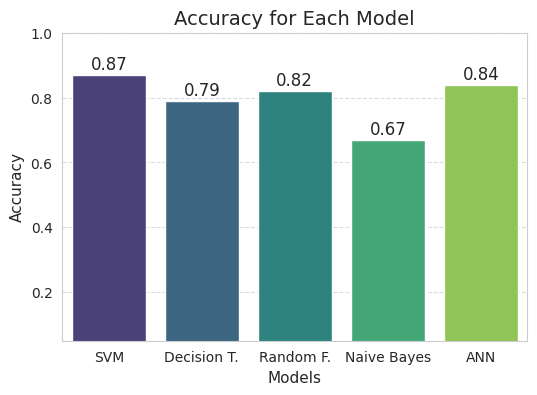

In [ ]:
# Data for the graph
x_dataGraph = ['SVM', 'Decision T.', 'Random F.', 'Naive Bayes',  'ANN']
accuracyDataGraph = [0.87, 0.79, 0.82, 0.67, 0.84]

# Plot settings
sns.barplot(x=x_dataGraph, y=accuracyDataGraph, hue=x_dataGraph, palette="viridis")
plt.title('Accuracy for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.ylim(0.05, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(accuracyDataGraph):
    plt.text(i, v + 0.005, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

Después de analizar exhaustivamente las características del conjunto de datos y evaluar los resultados obtenidos, se llega a la conclusión de que los modelos más efectivos para la clasificación son **Random Forest y Decision Trees**. Estos algoritmos demostraron niveles sobresalientes de precisión sin incurrir en sobreajuste. Además, poseen tiempos de entrenamiento y de procesamiento competitivos e inferiores a la mayoría.

#### Regression Algorithms

A continuación se muestran las métricas importantes de cada uno, obtenido del notebook de cada hoja realizada anteriormente con el algoritmo respectivo.

|                       | Linear Regression | Decision Trees   | Gaussian NB | SVM | ANN |
|-----------------------|-------------------   |-------|---------------|----------------|--------------|
|   R²            |       0.65            | 0.78       |     0.32           |      0.76      |    0.99999   |
|   MAE           |        38,159.69       | 26,864.915  |     41,074.15      |      28,483.35      |     157,785.14     |
|   Tiempo de ejecución |        0.01       | 0.02    |     0.04      |      1.0646       |     12.12     |

Al analizar la eficacia del modelo de Redes Neuronales Artificiales (ANN) con ReLU, para regresión, en comparación con otros algoritmos previamente empleados, utilizando la misma variable de respuesta, se observan resultados con precisión similar a la de los otros modelos. La ANN, a pesar de exhibir una precisión bastante aceptable, enfrenta desafíos leves de desajuste, una problemática menos pronunciada en los otros enfoques. Además, el tiempo requerido para su entrenamiento y procesamiento es sustancialmente más elevado en comparación con los demás modelos, lo que limita su practicidad en aplicaciones que requieren eficiencia computacional. A pesar de esto, cuenta con el puntaje R² más alto*** entre los otros modelos, con la desventaja de tener tiempos de entrenamiento considerablemente altos.

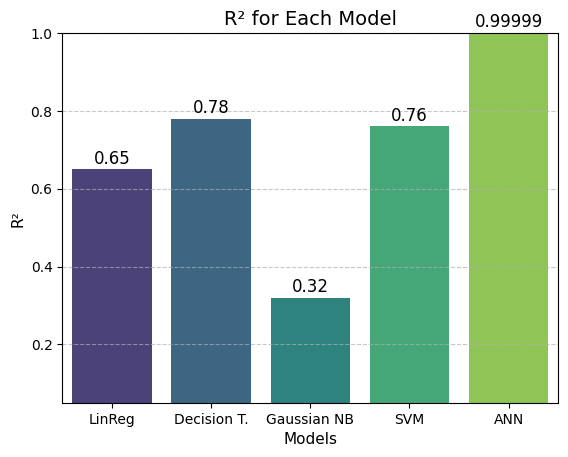

In [4]:
# Data for the graph
x_dataGraph = ['LinReg', 'Decision T.', 'Gaussian NB', 'SVM',  'ANN']
accuracyDataGraph = [0.65, 0.78, 0.32, 0.76, 0.99999]

# Plot settings
sns.barplot(x=x_dataGraph, y=accuracyDataGraph, hue=x_dataGraph, palette="viridis")
plt.title('R² for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=11)
plt.ylabel('R²', fontsize=11)
plt.ylim(0.05, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(accuracyDataGraph):
    plt.text(i, v + 0.005, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

Después de analizar exhaustivamente las características del conjunto de datos y evaluar los resultados obtenidos, se llega a la conclusión de que los modelos más efectivos para la clasificación son **Decision Trees y ANN(?)**. Estos algoritmos demostraron niveles de precisión considerables sin incurrir en sobreajuste significativo. A pesar de esto, los árboles de decisión cuentan con un tiempo de ejecución significativamente menor al de las ANN, por lo que, dependiendo de la aplicación, es posible que Decision Trees sea el mejor modelo en cuanto a regresión.